In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import classification_report,accuracy_score, roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams


In [2]:
df = pd.read_csv('Coding Exercise Dataset.csv')
df.head()

,num_houses,avg_hh_size,avg_age,customer_maintype,relation_married,relation_living,relation_other,hh_singles,hh_no_child,hh_with_child,...,num_prvt_accid,num_fmly_accid,num_disability,num_fire,num_surfbrd,num_boat,num_bike,num_property,num_ss,mobile_home_policy
0,1,2,4,C,4,1,4,4,2,4,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,I,6,0,3,3,3,4,...,0,0,0,0,0,0,0,0,0,0
2,1,4,3,I,7,1,2,1,1,8,...,0,0,0,1,0,0,1,0,0,1
3,1,2,4,A,5,0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,E,4,1,4,4,4,2,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df.isnull().values.any()

False

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 81 columns):
num_houses              8000 non-null int64
avg_hh_size             8000 non-null int64
avg_age                 8000 non-null int64
customer_maintype       8000 non-null object
relation_married        8000 non-null int64
relation_living         8000 non-null int64
relation_other          8000 non-null int64
hh_singles              8000 non-null int64
hh_no_child             8000 non-null int64
hh_with_child           8000 non-null int64
education_high          8000 non-null int64
education_medium        8000 non-null int64
education_low           8000 non-null int64
occp_high_status        8000 non-null int64
occp_entrepreneur       8000 non-null int64
occp_farmer             8000 non-null int64
occp_mgmt               8000 non-null int64
occp_skilled_lbr        8000 non-null int64
occp_unskilled_lbr      8000 non-null int64
social_cls_a            8000 non-null int64
social_cls_b

Text(0, 0.5, 'Frequency')

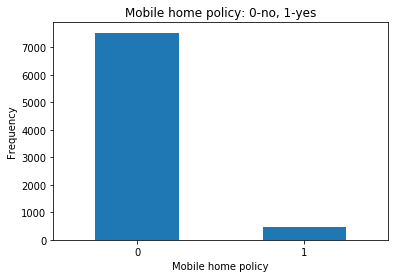

In [5]:
count_response = pd.value_counts(df['mobile_home_policy'], sort = True)

count_response.plot(kind = 'bar', rot=0)

plt.title("Mobile home policy: 0-no, 1-yes")
plt.xticks(range(2))
plt.xlabel("Mobile home policy")
plt.ylabel("Frequency")

# Data preprocess
* create dummies for categorical data
* stratefied split data to train/test set

In [6]:
# extract all the numeric cols
import re
num_cols = [re.findall(r'num_.*', i)[0] for i in df.columns if re.match(r'num_.*', i)]
[num_cols.append(i) for i in ['avg_hh_size', 'avg_income', 'purchase_pwr_cls']]
print(num_cols)

# convert all others to dummies
drop_cols= num_cols.copy()
drop_cols.append('mobile_home_policy')
df_cat = df.drop(drop_cols, axis=1)
df_cat = df_cat.astype('category')
df_dummy = pd.get_dummies(df_cat, drop_first='True')
df_dummy.head()

['num_houses', 'num_prvt_3rd_prt', 'num_3rd_prt_firm', 'num_3rd_prt_agri', 'num_car', 'num_deliv_van', 'num_scooter', 'num_lorry', 'num_trailer', 'num_tractor', 'num_agri_machine', 'num_moped', 'num_life', 'num_prvt_accid', 'num_fmly_accid', 'num_disability', 'num_fire', 'num_surfbrd', 'num_boat', 'num_bike', 'num_property', 'num_ss', 'avg_hh_size', 'avg_income', 'purchase_pwr_cls']


,avg_age_2,avg_age_3,avg_age_4,avg_age_5,avg_age_6,customer_maintype_B,customer_maintype_C,customer_maintype_D,customer_maintype_E,customer_maintype_F,...,contrib_property_1,contrib_property_2,contrib_property_3,contrib_property_4,contrib_property_5,contrib_property_6,contrib_ss_2,contrib_ss_3,contrib_ss_4,contrib_ss_5
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_preprocessed = pd.concat([df_dummy, df[num_cols], df['mobile_home_policy']], axis=1)
df_preprocessed.head()

,avg_age_2,avg_age_3,avg_age_4,avg_age_5,avg_age_6,customer_maintype_B,customer_maintype_C,customer_maintype_D,customer_maintype_E,customer_maintype_F,...,num_fire,num_surfbrd,num_boat,num_bike,num_property,num_ss,avg_hh_size,avg_income,purchase_pwr_cls,mobile_home_policy
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,4,4,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3,4,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,4,3,5,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,5,6,0
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,2,4,2,0


In [8]:
# split dataset
from sklearn.model_selection import train_test_split
x = df_preprocessed.drop('mobile_home_policy',axis=1)
y = df_preprocessed.mobile_home_policy
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100, stratify=y)
# Print the shapes of X & Y
print(x_train.shape)
print(y_train.shape)

(5600, 416)
(5600,)


# Try down sampling the majority based on near miss

In [9]:
# try fit a random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
import sklearn
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.
/home/raymond/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/raymond/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/raymond/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/raymond/.local/lib/python3.6/site-packages/tensorflow/py

In [10]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
x_re, y_re=nm.fit_sample(x_train,y_train)
print(x_re.shape, y_re.shape)

rfc = RandomForestClassifier(n_estimators=20).fit(x_re, y_re)
print('Predict on training set')

rfc_pred = rfc.predict(x_re)

print(accuracy_score(y_re, rfc_pred))
print(f1_score(y_re, rfc_pred))
print(recall_score(y_re, rfc_pred))
print(confusion_matrix(y_re, rfc_pred))


print('Predict on test set')

rfc_pred = rfc.predict(x_test)
print(accuracy_score(y_test, rfc_pred))
print(f1_score(y_test, rfc_pred))
print(recall_score(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))


(658, 416) (658,)
Predict on training set
0.9544072948328267
0.9535603715170279
0.9361702127659575
[[320   9]
 [ 21 308]]
Predict on test set
0.15333333333333332
0.10955302366345313
0.8865248226950354
[[ 243 2016]
 [  16  125]]


In [11]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(df_preprocessed.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: contrib_car_6        Importance: 0.04
Variable: num_car              Importance: 0.04
Variable: contrib_prvt_3rd_prt_2 Importance: 0.03
Variable: contrib_fire_4       Importance: 0.03
Variable: num_prvt_3rd_prt     Importance: 0.03
Variable: num_fire             Importance: 0.03
Variable: occp_entrepreneur_1  Importance: 0.02
Variable: avg_income           Importance: 0.02
Variable: purchase_pwr_cls     Importance: 0.02
Variable: customer_maintype_B  Importance: 0.01
Variable: customer_maintype_C  Importance: 0.01
Variable: customer_maintype_H  Importance: 0.01
Variable: customer_maintype_I  Importance: 0.01
Variable: hh_singles_1         Importance: 0.01
Variable: hh_no_child_6        Importance: 0.01
Variable: education_high_2     Importance: 0.01
Variable: education_medium_4   Importance: 0.01
Variable: education_low_3      Importance: 0.01
Variable: education_low_4      Importance: 0.01
Variable: occp_mgmt_7          Importance: 0.01
Variable: occp_skilled_lbr_4   Importa

the resample does not have good generalization over the data population

# Try oversample the minority

In [12]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
x_re,y_re=smk.fit_sample(x_train,y_train)
print(x_re.shape, y_re.shape)

(10380, 416) (10380,)


In [13]:
rfc = RandomForestClassifier(n_estimators=20).fit(x_re, y_re)
print('Predict on training set')

rfc_pred = rfc.predict(x_re)

print(accuracy_score(y_re, rfc_pred))
print(f1_score(y_re, rfc_pred))
print(recall_score(y_re, rfc_pred))
print(confusion_matrix(y_re, rfc_pred))


print('Predict on test set')

rfc_pred = rfc.predict(x_test)
print(accuracy_score(y_test, rfc_pred))
print(f1_score(y_test, rfc_pred))
print(recall_score(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))


Predict on training set
0.9925818882466282
0.992579743663872
0.9922928709055877
[[5153   37]
 [  40 5150]]
Predict on test set
0.9204166666666667
0.12785388127853883
0.09929078014184398
[[2195   64]
 [ 127   14]]


In [14]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
x_re, y_re = os.fit_sample(x_train, y_train)
print(x_re.shape,y_re.shape)

rfc = RandomForestClassifier(n_estimators=20).fit(x_re, y_re)
print('Predict on training set')

rfc_pred = rfc.predict(x_re)

print(accuracy_score(y_re, rfc_pred))
print(f1_score(y_re, rfc_pred))
print(recall_score(y_re, rfc_pred))
print(confusion_matrix(y_re, rfc_pred))


print('Predict on test set')

rfc_pred = rfc.predict(x_test)
print(accuracy_score(y_test, rfc_pred))
print(f1_score(y_test, rfc_pred))
print(recall_score(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

(10542, 416) (10542,)
Predict on training set
0.9926010244735345
0.9926553672316385
1.0
[[5193   78]
 [   0 5271]]
Predict on test set
0.91375
0.11914893617021277
0.09929078014184398
[[2179   80]
 [ 127   14]]


In [15]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(df_preprocessed.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: contrib_car_6        Importance: 0.04
Variable: num_car              Importance: 0.04
Variable: contrib_prvt_3rd_prt_2 Importance: 0.03
Variable: avg_income           Importance: 0.03
Variable: purchase_pwr_cls     Importance: 0.03
Variable: contrib_fire_4       Importance: 0.02
Variable: num_prvt_3rd_prt     Importance: 0.02
Variable: num_fire             Importance: 0.02
Variable: customer_maintype_C  Importance: 0.01
Variable: customer_maintype_H  Importance: 0.01
Variable: customer_maintype_I  Importance: 0.01
Variable: relation_married_7   Importance: 0.01
Variable: hh_with_child_4      Importance: 0.01
Variable: occp_farmer_1        Importance: 0.01
Variable: social_cls_a_2       Importance: 0.01
Variable: social_cls_b1_2      Importance: 0.01
Variable: social_cls_c_5       Importance: 0.01
Variable: house_owned_9        Importance: 0.01
Variable: cars_one_6           Importance: 0.01
Variable: cars_one_7           Importance: 0.01
Variable: cars_none_4          Importa

Model fitted on oversampling has slighterly improvement on the model predict

# Try different machine learning methods

In [16]:
svmc = OneClassSVM().fit(x_re, y_re)

In [17]:
svmc_pred = svmc.predict(x_re)
svmc_pred[svmc_pred==-1] = 0
print(accuracy_score(y_re, svmc_pred))
print(f1_score(y_re, svmc_pred))
print(recall_score(y_re, svmc_pred))
print(confusion_matrix(y_re, svmc_pred))


print('Predict on test set')

svmc_pred = rfc.predict(x_test)
svmc_pred[svmc_pred==-1] = 0
print(accuracy_score(y_test, svmc_pred))
print(f1_score(y_test, svmc_pred))
print(recall_score(y_test, svmc_pred))
print(confusion_matrix(y_test, svmc_pred))

0.5120470498956555
0.5121396054628226
0.5122367672168469
[[2698 2573]
 [2571 2700]]
Predict on test set
0.91375
0.11914893617021277
0.09929078014184398
[[2179   80]
 [ 127   14]]


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_re,y_re)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_re.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [19]:
featureScores

,Specs,Score
0,avg_age_2,3.576207
1,avg_age_3,0.423831
2,avg_age_4,5.990401
3,avg_age_5,0.861702
4,avg_age_6,6.533333
...,...,...
411,num_property,0.486486
412,num_ss,38.404255
413,avg_hh_size,22.871798
414,avg_income,278.366488


In [20]:
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                      Specs       Score
308           contrib_car_6  543.348757
366          contrib_fire_4  465.685380
415        purchase_pwr_cls  439.747272
395                 num_car  385.776334
414              avg_income  278.366488
205           house_owned_9  265.390416
294  contrib_prvt_3rd_prt_2  248.556485
364          contrib_fire_2  233.425197
254          income_grp_1_5  217.227848
392        num_prvt_3rd_prt  201.212524
253          income_grp_1_4  186.808599
307           contrib_car_5  179.395257
5       customer_maintype_B  179.116854
8       customer_maintype_E  177.253201
271          income_grp_3_4  175.486957
85          education_low_2  162.559445
92          education_low_9  154.735537
226             cars_none_4  153.808989
34         relation_other_5  151.953488
69         education_high_4  139.733828


In [21]:
best_features = featureScores.nlargest(6,'Score')['Specs']
best_features = best_features.tolist()
x_re_best = x_re[best_features]

In [23]:
rfc = RandomForestClassifier(n_estimators=20).fit(x_re_best, y_re)
print('Predict on training set')

rfc_pred = rfc.predict(x_re_best)

print(accuracy_score(y_re, rfc_pred))
print(f1_score(y_re, rfc_pred))
print(recall_score(y_re, rfc_pred))
print(roc_auc_score(y_re, rfc_pred))
print(confusion_matrix(y_re, rfc_pred))


print('Predict on test set')

rfc_pred = rfc.predict(x_test[best_features])
print(accuracy_score(y_test, rfc_pred))
print(f1_score(y_test, rfc_pred))
print(recall_score(y_test, rfc_pred))
print(roc_auc_score(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

Predict on training set
0.7946309998102826
0.807023798912559
0.85885031303358
0.7946309998102826
[[3850 1421]
 [ 744 4527]]
Predict on test set
0.7116666666666667
0.19534883720930232
0.5957446808510638
0.657323424976218
[[1624  635]
 [  57   84]]


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier().fit(x_re_best, y_re)

print('Predict on training set')

dtf_pred = dtf.predict(x_re_best)

print(accuracy_score(y_re, dtf_pred))
print(f1_score(y_re, dtf_pred))
print(recall_score(y_re, dtf_pred))
print(roc_auc_score(y_re, dtf_pred))
print(confusion_matrix(y_re, dtf_pred))


print('Predict on test set')

dtf_pred = dtf.predict(x_test[best_features])
print(accuracy_score(y_test, dtf_pred))
print(f1_score(y_test, dtf_pred))
print(recall_score(y_test, dtf_pred))
print(roc_auc_score(y_test, dtf_pred))
print(confusion_matrix(y_test, dtf_pred))

Predict on training set
0.7946309998102826
0.8054632042411718
0.8503130335799659
0.7946309998102826
[[3895 1376]
 [ 789 4482]]
Predict on test set
0.7179166666666666
0.1930870083432658
0.574468085106383
0.6506691908488976
[[1642  617]
 [  60   81]]


In [27]:
# adding more features ordered by k2 scores
acc_1, roc_auc_score_1, recall_1, acc_2, roc_auc_score_2, recall_2 = [], [], [], [], [], []
for i in range(1,21):
    best_features = featureScores.nlargest(i,'Score')['Specs']
    best_features = best_features.tolist()
    x_re_best = x_re[best_features]
    
    rfc = RandomForestClassifier(n_estimators=20).fit(x_re_best, y_re)
    rfc_pred = rfc.predict(x_re_best)

    acc_1.append(accuracy_score(y_re, rfc_pred))
    roc_auc_score_1.append(roc_auc_score(y_re, rfc_pred))
    recall_1.append(recall_score(y_re, rfc_pred))

    rfc_pred = rfc.predict(x_test[best_features])
    acc_2.append(accuracy_score(y_test, rfc_pred))
    roc_auc_score_2.append(roc_auc_score(y_test, rfc_pred))
    recall_2.append(recall_score(y_test, rfc_pred))
    

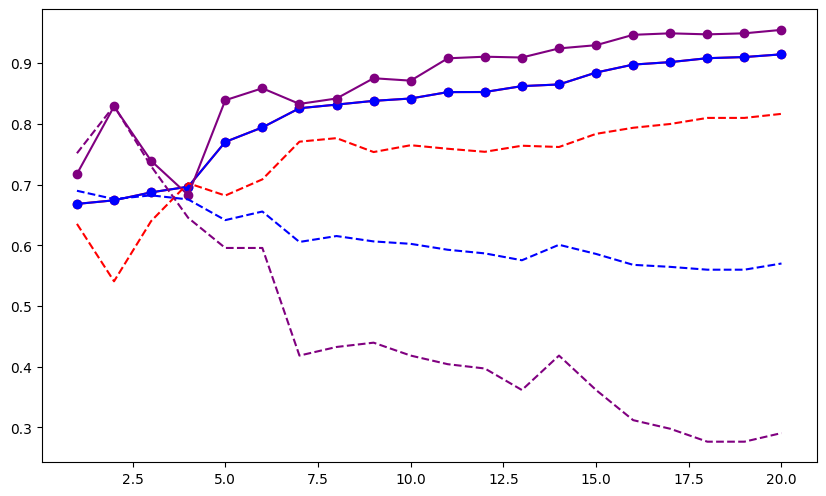

In [29]:
plt.figure(figsize = (10,6), dpi=100)
num_features = np.arange(1,21)
plt.plot(num_features, acc_1, 'o-', color='red')
plt.plot(num_features, roc_auc_score_1, 'o-', color='blue')
plt.plot(num_features, recall_1, 'o-', color='purple')

plt.plot(num_features, acc_2, '--', color='red')
plt.plot(num_features, roc_auc_score_2, '--', color='blue')
plt.plot(num_features, recall_2, '--', color='purple')
plt.show()